# Plot a sentiment graph on the tweets

In [8]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import pip
pip.main(['install', 'requests'])
pip.main(["install","Twitter"])
import  twitter
from twitter import Twitter
from twitter import OAuth
import matplotlib.pyplot as plt


!python -m textblob.download_corpora
from  textblob import TextBlob


[nltk_data] Downloading package brown to
[nltk_data]     /Users/prabhatjohl/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prabhatjohl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prabhatjohl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prabhatjohl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/prabhatjohl/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/prabhatjohl/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [9]:
ck="OwENz4tXuarnZIi0PKtmfhlh7"
cs="L3IOhPkMhKyFH6zAHcQEKLqRWBwDIwPdRiexcBs0j11rtkVdPO"
at="451334829-k8h4sCMhPTqd9JhhlqzoJcvMAZSdk6v3mlJc91cY"
ats="d6JdyHLrP1VkxXccadjlxvTN2YWi6f0IxeqtHl0jrM3lV"

oauth=  OAuth(at,ats,ck,cs)
api= Twitter(auth=oauth)

In [10]:
query = api.search.tweets(q='Blackpanther', count=1000)
mid=0;
df=pd.DataFrame()    
for i in range(10):
    if i==0:
        search_result= api.search.tweets(q="Blackpanther", count=100)
    else:
        search_result= api.search.tweets(q="Blackpanther", count=100, max_id=mid)
    
        dftemp= json_normalize(search_result,'statuses')
        mid= dftemp['id'].min()
        mid=mid-1
        df=df.append(dftemp,ignore_index=True)
    

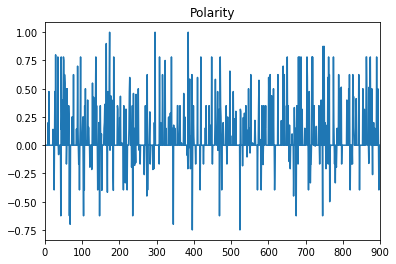

In [16]:
tweettext=df['text']

wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

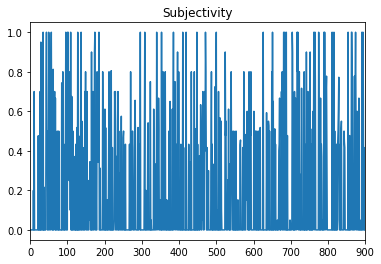

In [18]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()